# LIMPIEZA DE DATOS CON PYTHON Y PANDAS

Se darán herramientas y recursos básicos para limpiar un dataset usando python se usará un dataset de información de clientes extraido de Kaggle.

In [2]:
# IMPORTAR LIBRERÍAS 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LECTURA DEL DATAFRAME

ruta = "C:/Users/Julian/Downloads/dataset_banco.csv"
data = pd.read_csv(ruta)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [4]:
# CANTIDAD DE FILAS Y COLUMNAS 

data.shape

(45215, 17)

In [5]:
# TIPOS DE DATOS POR COLUMNA

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [6]:
# CÁLCULO DE DATOS NULOS POR COLUMNA 

data.isna().sum().sort_values(ascending = False)

balance      2
job          2
duration     1
marital      1
education    1
pdays        1
age          0
poutcome     0
previous     0
campaign     0
contact      0
month        0
day          0
loan         0
housing      0
default      0
y            0
dtype: int64

In [7]:
# ELIMINACIÓN DE TODOS LOS NULOS

data.dropna(inplace = True)

In [8]:
# VER NUEVAMENTE LA INFORMACIÓN SIN NULOS

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [9]:
# CONTEO DE SUBNIVELES O CATEGORIAS POR CADA COLUMNA

categoricas = data.select_dtypes(include=['object', 'category']).columns
for col in categoricas:
    print(f'Columna ({col}): {data[col].nunique()} subniveles')

Columna (job): 18 subniveles
Columna (marital): 6 subniveles
Columna (education): 10 subniveles
Columna (default): 2 subniveles
Columna (housing): 2 subniveles
Columna (loan): 6 subniveles
Columna (contact): 5 subniveles
Columna (month): 12 subniveles
Columna (poutcome): 6 subniveles
Columna (y): 2 subniveles


- Aquellas que solo tienen un subnivel serán eliminadas, en este caso no aplica.

In [11]:
# VER COLUMNAS DE TIPO CATEGORICAS Y OBJETOS

categoricas

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [12]:
# VER ESTADISTICAS DEVARIABLES NÚMERICAS 

data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### DATOS DUPLICADOS

In [14]:
print(f"Tamaño antes de eliminar duplicados {data.shape}")
data.drop_duplicates(inplace = True)
print(f"Tamaño antes de eliminar duplicados {data.shape}")

Tamaño antes de eliminar duplicados (45207, 17)
Tamaño antes de eliminar duplicados (45203, 17)


#### OUTLIERS EN LAS VARIABLES NÚMERICAS 

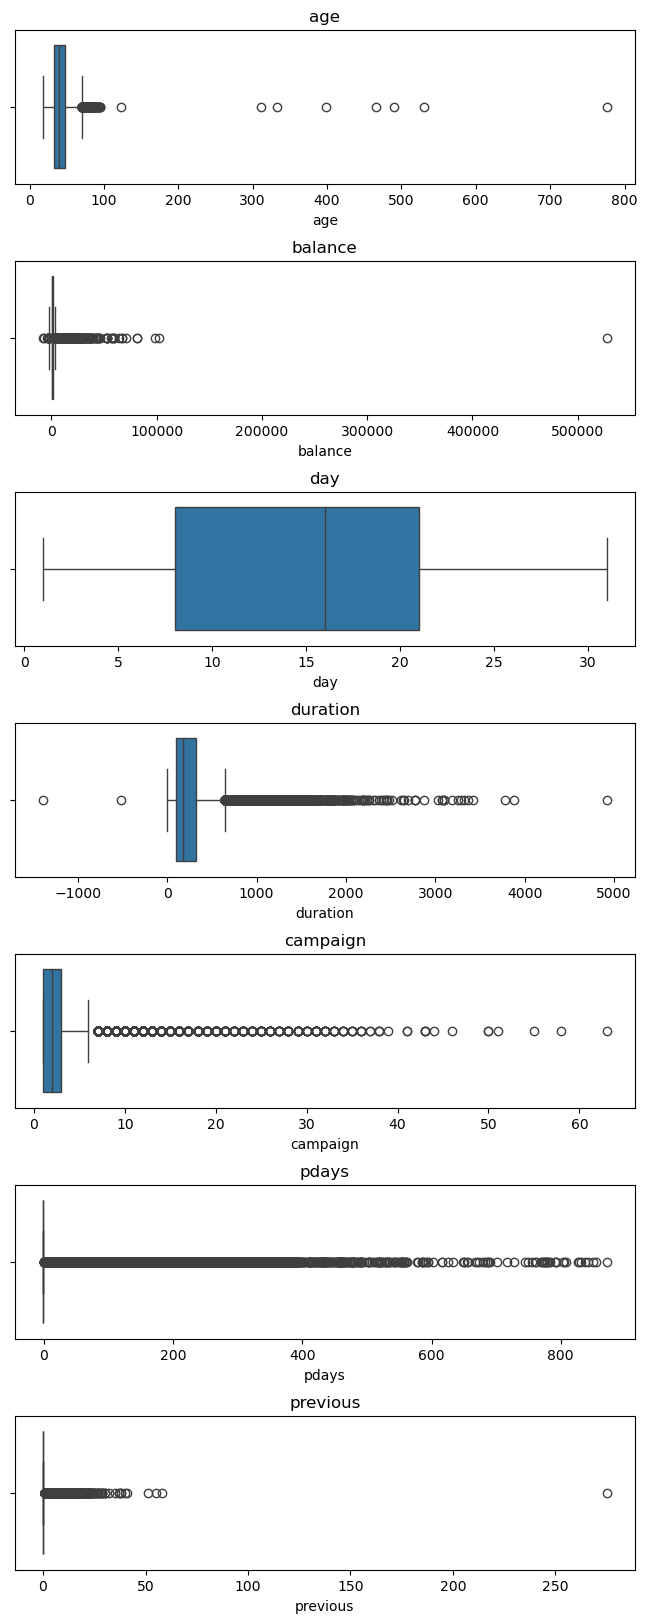

In [16]:
# SELECCIONAR VARIABLES NUMERICAS 

numericas = data.select_dtypes(include=['int64', 'float64']).columns

# CREAR GRÁGICO DE CAJA 

fig, ax = plt.subplots(nrows=len(numericas), ncols=1, figsize=(8, 20))
fig.subplots_adjust(hspace=0.5)

# BUCLE POR CADA VARIABLE NUMERICA PARA CREAR UN GRÁFICO 

for i, col in enumerate(numericas):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [18]:
# ELIMINAR DATOS ATIPICOS EN EDAD

print(f"Tamaño antes de eliminar duplicados {data.shape}")
data = data[data["age"]<=100]
print(f"Tamaño antes de eliminar duplicados {data.shape}")

Tamaño antes de eliminar duplicados (45203, 17)
Tamaño antes de eliminar duplicados (45195, 17)


In [19]:
# ELIMINAR DATOS ATIPICOS EN LA DURACIÓN 

print(f"Tamaño antes de eliminar duplicados {data.shape}")
data = data[data["duration"]>0]
print(f"Tamaño antes de eliminar duplicados {data.shape}")

Tamaño antes de eliminar duplicados (45195, 17)
Tamaño antes de eliminar duplicados (45190, 17)


In [20]:
# ELIMINAR DATOS ATIPICOS EN LA COLUMNA PREVIOUS

print(f"Tamaño antes de eliminar duplicados {data.shape}")
data = data[data["previous"]<=100]
print(f"Tamaño antes de eliminar duplicados {data.shape}")

Tamaño antes de eliminar duplicados (45190, 17)
Tamaño antes de eliminar duplicados (45189, 17)


#### Errores tipográficos en variables categóricas

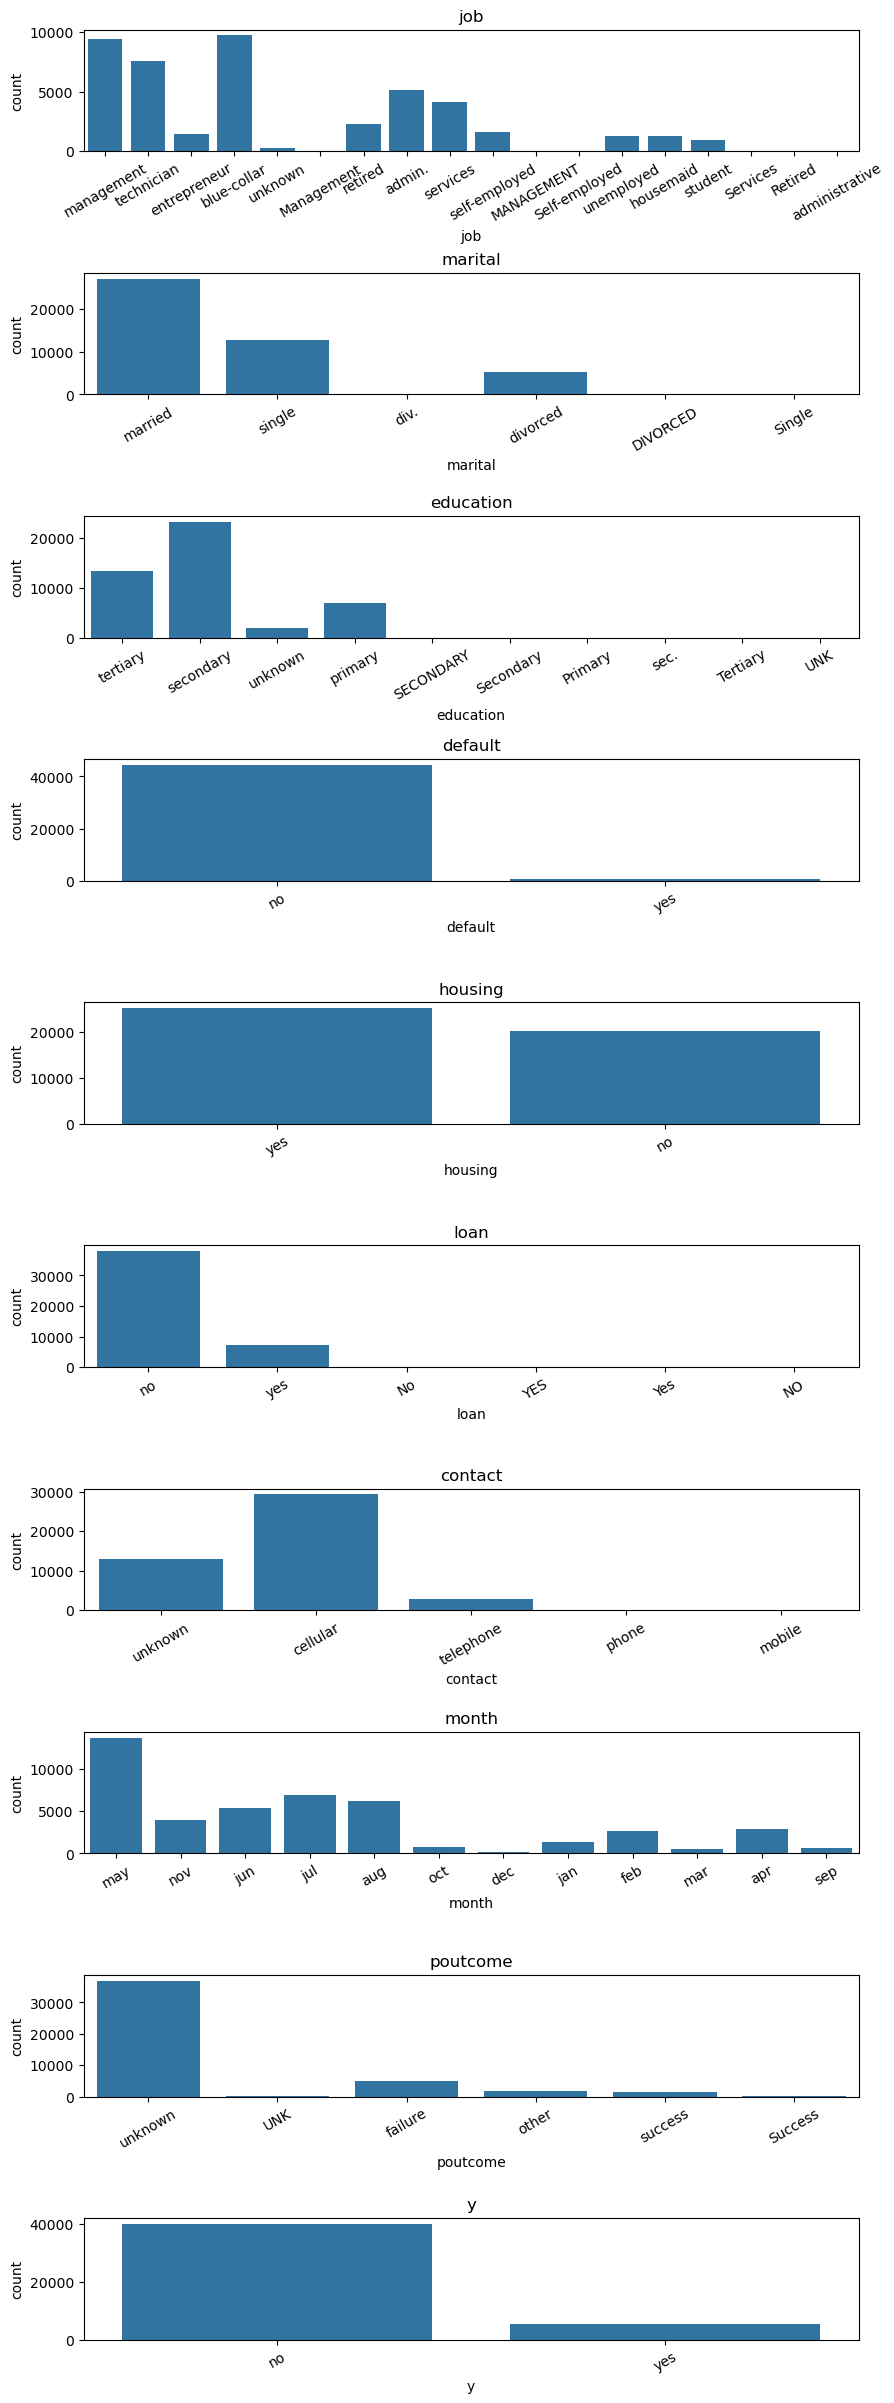

In [22]:
# EXTRAER VARIABLES CATEGORICAS

categoricas = data.select_dtypes(include=['object', 'category']).columns

# CREACIÓN DE GRÁFICO

fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

# BUCLE QUE CREA GRÁFICO POR CADA VARIABLE 

for i, col in enumerate(categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ticks = ax[i].get_xticks()
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

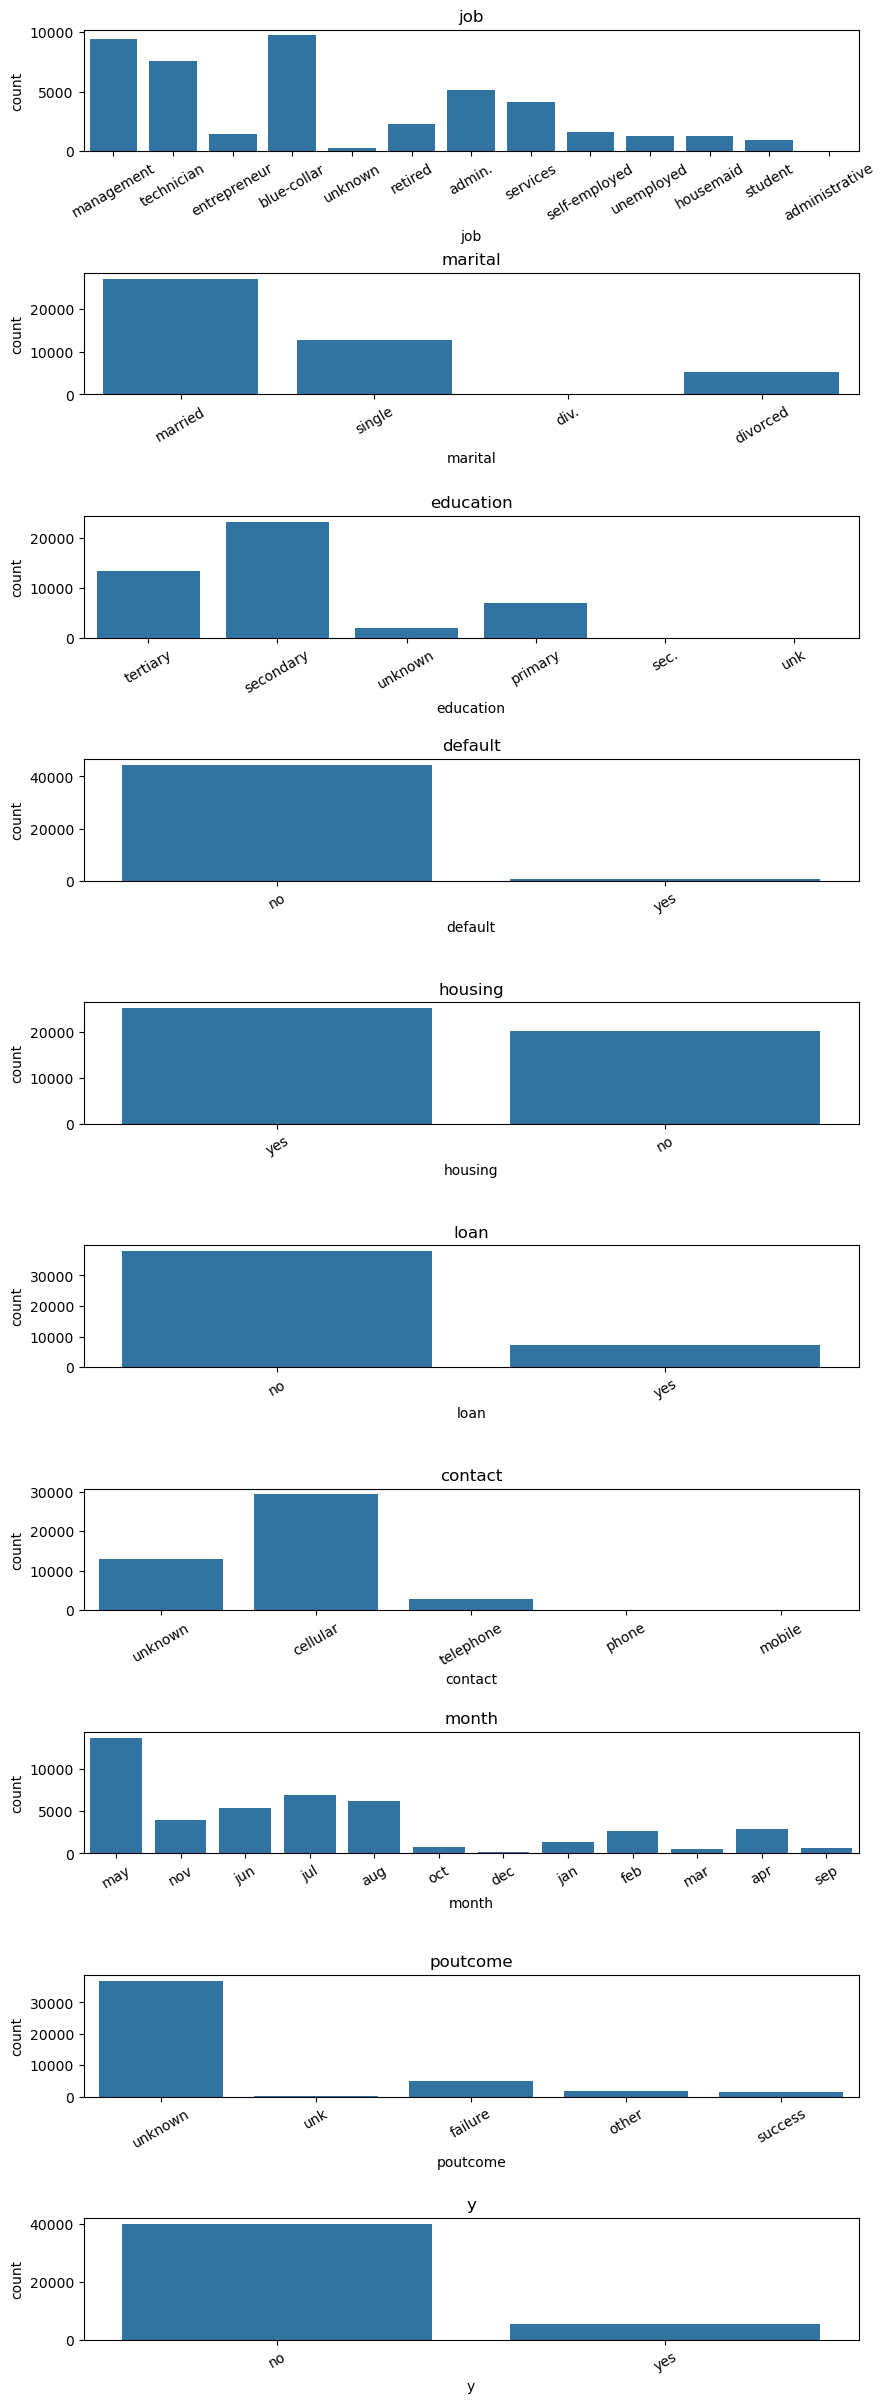

In [24]:
# CAMBIAR A MINUSCULAS LAS VARIABLES 

for columna in data.columns:
    if columna in categoricas:
        data[columna] = data[columna].str.lower()

fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ticks = ax[i].get_xticks()
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [25]:
# FINALIZAR REEMPLAZANDO CATEGORÍAS MAL ESCRITAS

data["poutcome"] = data["poutcome"].replace("unk", "unknown")
data["contact"] = data["contact"].replace(["cellular","telephone","mobile"], "phone")
data["education"] = data["education"].replace("sec.", "secondary")
data["education"] = data["education"].replace("unk", "unknown")
data["marital"] = data["marital"].replace("div.", "divorced")

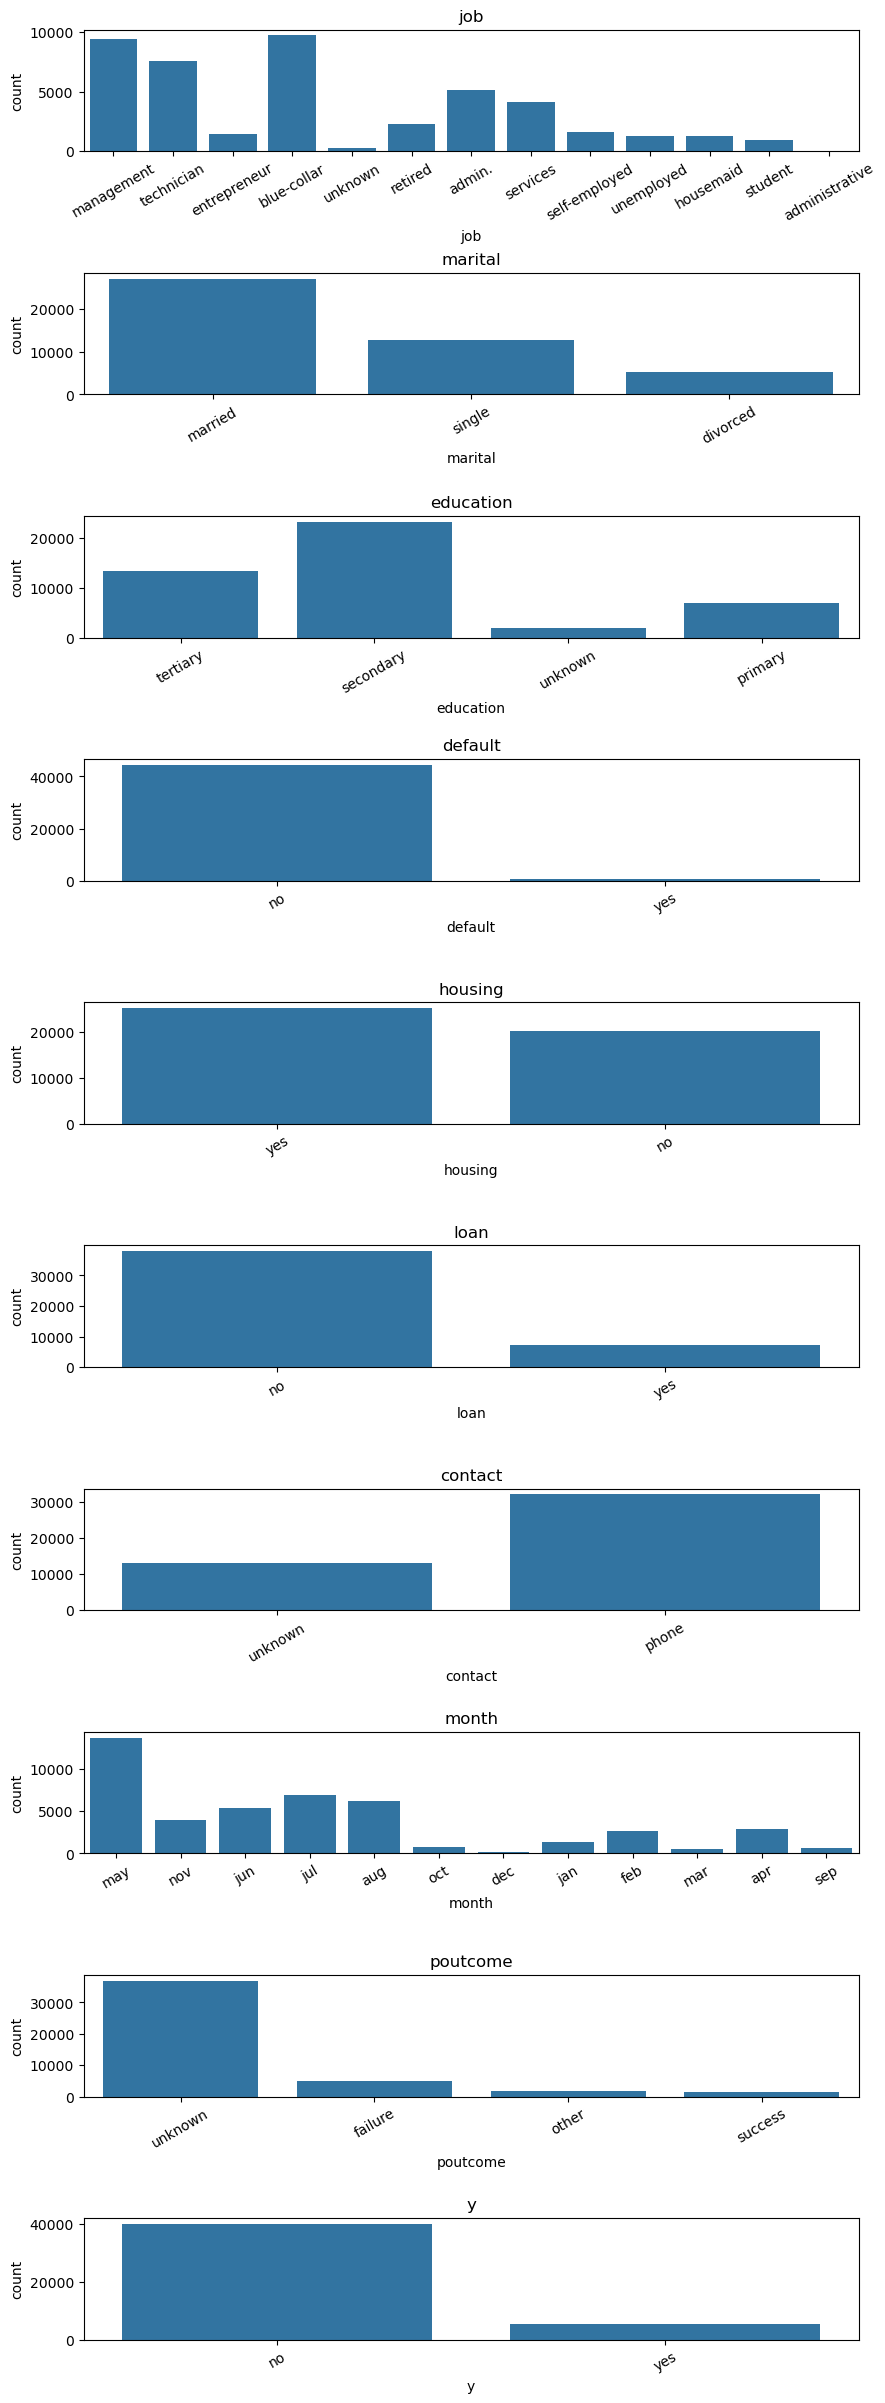

In [26]:
# VERIFICAR NUEVAMENTE

fig, ax = plt.subplots(nrows=len(categoricas), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

# BUCLE QUE CREA GRÁFICO POR CADA VARIABLE 

for i, col in enumerate(categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ticks = ax[i].get_xticks()
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)